# SIMP example: Point Load Cantilever

## Commented Program

What follows is a program spliced with comments.

In [1]:
using TopOpt

### Define the problem

In [2]:
E = 1.0 # Young’s modulus
v = 0.3 # Poisson’s ratio
f = 1.0; # downward force

nels = (30, 10, 10)
problem = PointLoadCantilever(Val{:Linear}, nels, (1.0, 1.0, 1.0), E, v, f);

See also the detailed API of `PointLoadCantilever`:

### Parameter settings

In [3]:
V = 0.3 # volume fraction
xmin = 1e-6 # minimum density
rmin = 2.0; # density filter radius

### Define a finite element solver

In [4]:
penalty = TopOpt.PowerPenalty(3.0)
solver = FEASolver(Direct, problem; xmin=xmin, penalty=penalty)

### Define compliance objective

In [5]:
comp = TopOpt.Compliance(solver)
filter = DensityFilter(solver; rmin=rmin)
obj = x -> comp(filter(PseudoDensities(x)))

#1 (generic function with 1 method)

### Define volume constraint

In [6]:
volfrac = TopOpt.Volume(solver)
constr = x -> volfrac(filter(PseudoDensities(x))) - V

#3 (generic function with 1 method)

### Define subproblem optimizer

In [7]:
x0 = fill(V, length(solver.vars))
model = Model(obj)
addvar!(model, zeros(length(x0)), ones(length(x0)))
add_ineq_constraint!(model, constr)
alg = MMA87()
convcriteria = Nonconvex.KKTCriteria()
options = MMAOptions(;
    maxiter=3000, tol=Nonconvex.Tolerance(; x=1e-3, f=1e-3, kkt=0.001), convcriteria
)
r = optimize(model, alg, x0; options)

@show obj(r.minimizer)

[ Info:   iter       obj      Δobj  violation  kkt_residual  
[ Info:      0   4.9e+02       Inf   0.0e+00   3.0e+01
[ Info:      1   3.6e+02   1.3e+02   0.0e+00   1.4e+02
[ Info:      2   2.1e+02   1.5e+02   0.0e+00   7.6e+01
[ Info:      3   1.4e+02   7.2e+01   0.0e+00   1.9e+01
[ Info:      4   1.0e+02   3.5e+01   0.0e+00   8.0e+00
[ Info:      5   8.2e+01   1.9e+01   0.0e+00   4.3e+00
[ Info:      6   7.0e+01   1.2e+01   0.0e+00   2.9e+00
[ Info:      7   6.2e+01   8.4e+00   0.0e+00   2.3e+00
[ Info:      8   5.6e+01   5.7e+00   0.0e+00   1.4e+00
[ Info:      9   5.3e+01   3.6e+00   0.0e+00   8.1e-01
[ Info:     10   5.0e+01   2.4e+00   0.0e+00   5.6e-01
[ Info:     11   4.8e+01   1.8e+00   0.0e+00   4.1e-01
[ Info:     12   4.7e+01   1.3e+00   0.0e+00   3.0e-01
[ Info:     13   4.6e+01   1.0e+00   0.0e+00   2.2e-01
[ Info:     14   4.5e+01   8.6e-01   0.0e+00   2.0e-01
[ Info:     15   4.4e+01   7.5e-01   0.0e+00   1.7e-01
[ Info:     16   4.4e+01   6.4e-01   0.0e+00   1.4e-01
[ I

42.23812907385517

### (Optional) Visualize the result using Makie.jl
Need to run `using Pkg; Pkg.add("Makie")` first and either `Pkg.add("CairoMakie")` or `Pkg.add("GLMakie")`

In [8]:
using Makie
using CairoMakie

alternatively, `using GLMakie`

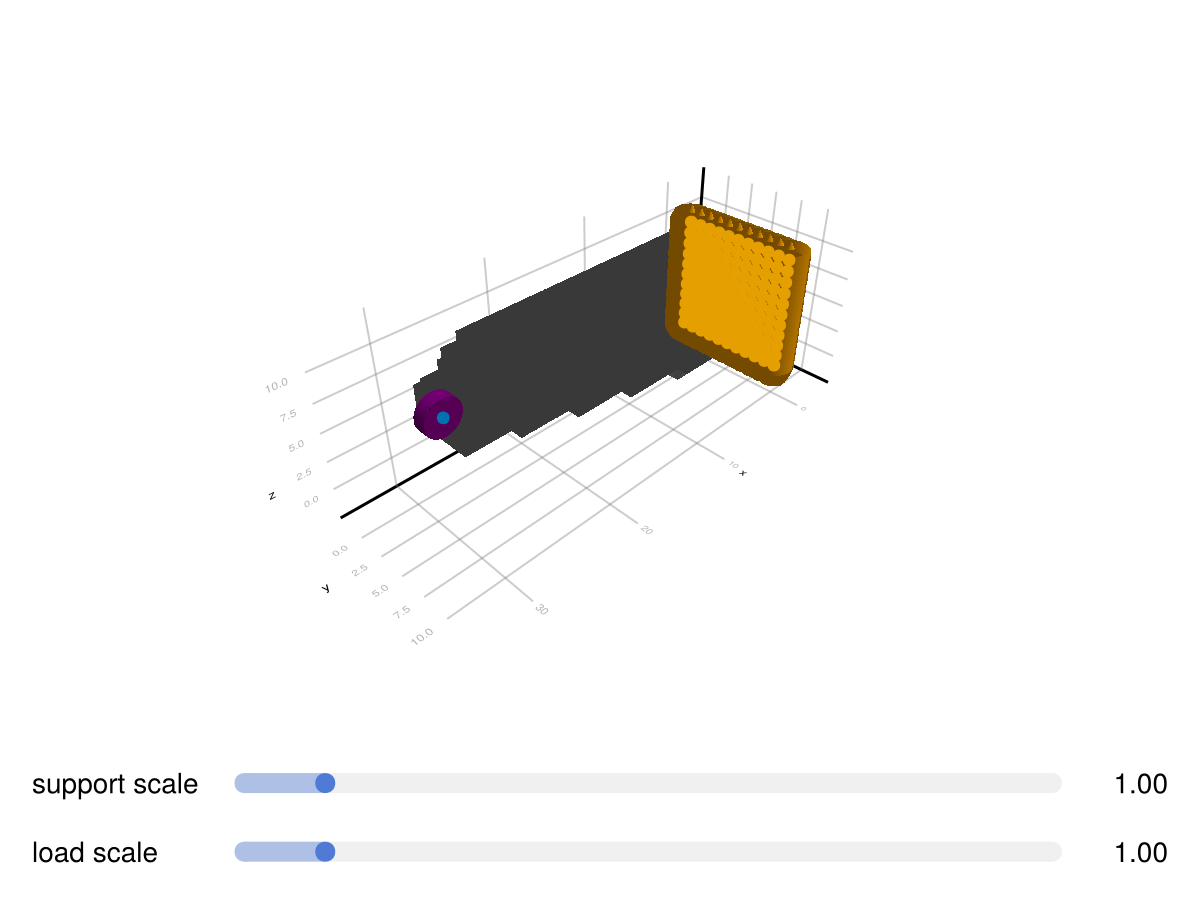

CairoMakie.Screen{IMAGE}


In [9]:
fig = visualize(
    problem;
    topology=r.minimizer,
    default_exagg_scale=0.07,
    scale_range=10.0,
    vector_linewidth=3,
    vector_arrowsize=0.5,
)
Makie.display(fig)

or convert it to a Mesh
Need to run `using Pkg; Pkg.add(GeometryBasics)` first

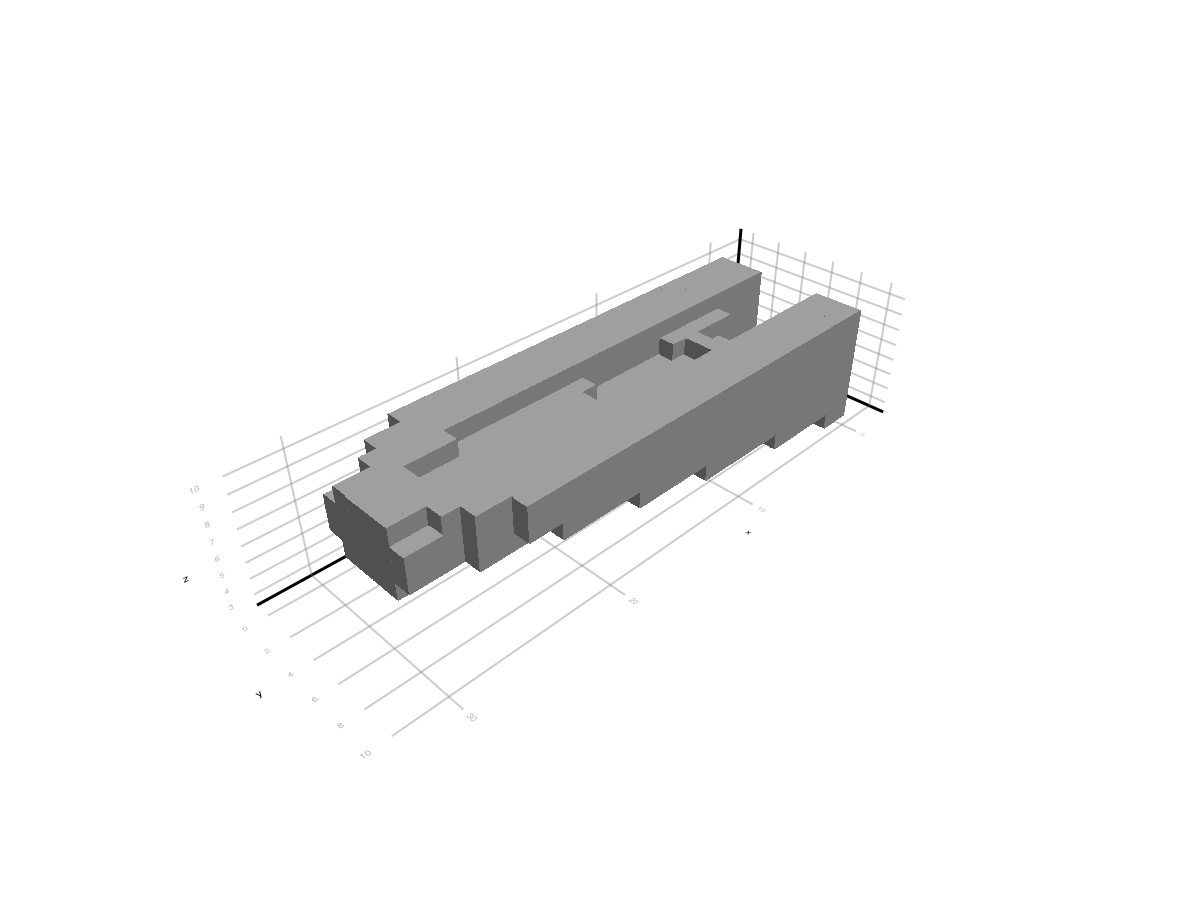

In [10]:
using Makie, GeometryBasics
result_mesh = GeometryBasics.Mesh(problem, r.minimizer);
Makie.mesh(result_mesh)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*